In [16]:
import pandas as pd

UHH_COLOR = "#e2001a"
HAW_COLOR = "#003ca0"
TUHH_COLOR = "#00C1D4"

In [17]:
from graph.analyse_graph import (
    select_citations_by_year,
    select_members_by_inst,
    res_to_dataframe,
    UNI_LABELS,
)

df = res_to_dataframe(select_citations_by_year())
df = df[df["year"] != 2022]  # ignore 2022 as incomplete year
df.head()

parsing graph
starting query
33 results:



,inst_name,year,AMOUNT
1,Hamburg University of Applied Sciences,2021,509
2,Hamburg University of Applied Sciences,2020,440
3,Hamburg University of Applied Sciences,2019,439
4,Hamburg University of Applied Sciences,2018,364
5,Hamburg University of Applied Sciences,2017,307


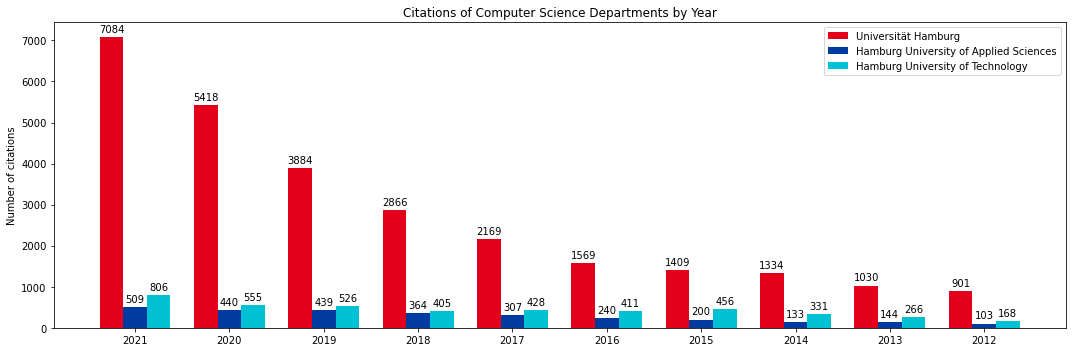

In [22]:
import matplotlib.pyplot as plt
import numpy as np

labels = df["year"].unique()
uhh = df[df["inst_name"] == UNI_LABELS["uhh"]]
haw = df[df["inst_name"] == UNI_LABELS["haw"]]
tuhh = df[df["inst_name"] == UNI_LABELS["tuhh"]]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - width/3, uhh["AMOUNT"], width/3, label=UNI_LABELS["uhh"], color=UHH_COLOR)
rects2 = ax.bar(x, haw["AMOUNT"], width/3, label=UNI_LABELS["haw"], color=HAW_COLOR)
rects3 = ax.bar(x + width/3, tuhh["AMOUNT"], width/3, label=UNI_LABELS["tuhh"], color=TUHH_COLOR)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of citations')
ax.set_title('Citations of Computer Science Departments by Year')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.savefig("../img/abs_cit_by_inst.png")
plt.show()

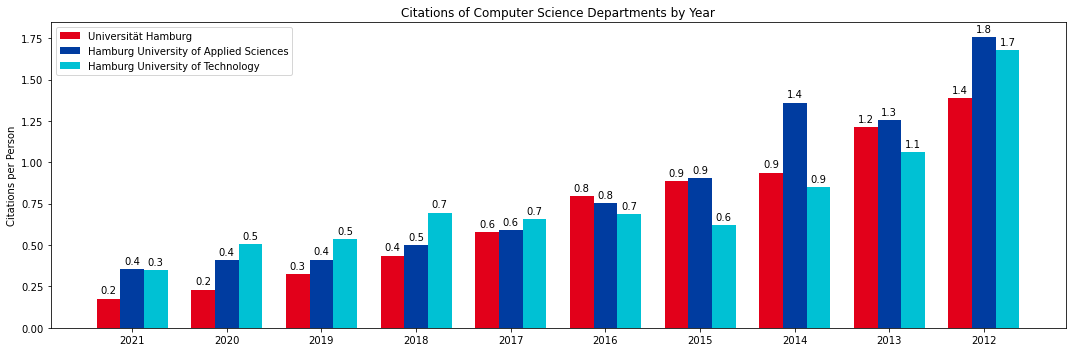

In [23]:
labels = df["year"].unique()
uhh = df[df["inst_name"] == UNI_LABELS["uhh"]]
haw = df[df["inst_name"] == UNI_LABELS["haw"]]
tuhh = df[df["inst_name"] == UNI_LABELS["tuhh"]]

# df_member = res_to_dataframe(select_members_by_inst())  # takes longer, use precomputed
cols = ["INSTITUTE", "MEMBERS"]
data = [
    ("Hamburg University of Applied Sciences", 181),
    ("Hamburg University of Technology", 282),
    ("Universität Hamburg", 1251),
]
df_member = pd.DataFrame(columns=cols, data=data)

uhh_members = df_member[df_member["INSTITUTE"] == UNI_LABELS["uhh"]]["MEMBERS"].iloc[0]
haw_members = df_member[df_member["INSTITUTE"] == UNI_LABELS["haw"]]["MEMBERS"].iloc[0]
tuhh_members = df_member[df_member["INSTITUTE"] == UNI_LABELS["tuhh"]]["MEMBERS"].iloc[0]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - width/3, uhh_members/uhh["AMOUNT"], width/3, label=UNI_LABELS["uhh"], color=UHH_COLOR)
rects2 = ax.bar(x, haw_members/haw["AMOUNT"], width/3, label=UNI_LABELS["haw"], color=HAW_COLOR)
rects3 = ax.bar(x + width/3, tuhh_members/tuhh["AMOUNT"], width/3, label=UNI_LABELS["tuhh"], color=TUHH_COLOR)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Citations per Person')
ax.set_title('Citations of Computer Science Departments by Year')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.1f')
ax.bar_label(rects2, padding=3, fmt='%.1f')
ax.bar_label(rects3, padding=3, fmt='%.1f')

fig.tight_layout()

plt.savefig("../img/rel_cit_by_inst.png")
plt.show()